# Global Solution - Redes Neurais


In [ ]:
# Importando as bibliotecas que serão utilizadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers  import Dense, Dropout
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### Descrição do dataset

*Heart Attack Prediction*

Este conjunto de dados é voltado para a análise de risco de ataque cardíaco em pacientes, com base em uma variedade de fatores de saúde e estilo de vida. Aqui está uma explicação de cada coluna:

1. **Patient ID**: Um identificador único para cada paciente.
2. **Age**: Idade do paciente.
3. **Sex**: Sexo do paciente (Masculino ou Feminino).
4. **Cholesterol**: Nível de colesterol do paciente.
5. **Blood Pressure**: Pressão arterial do paciente, registrada como sistólica/diastólica.
6. **Heart Rate**: Frequência cardíaca do paciente.
7. **Diabetes**: Indica se o paciente tem diabetes (1 para sim, 0 para não).
8. **Family History**: Indica se há histórico de problemas cardíacos na família (1 para sim, 0 para não).
9. **Smoking**: Indica se o paciente é fumante (1 para sim, 0 para não).
10. **Obesity**: Indica se o paciente é obeso (1 para sim, 0 para não).
11. **Alcohol Consumption**: Consumo de álcool do paciente.
12. **Exercise Hours Per Week**: Quantidade de horas de exercício por semana.
13. **Diet**: Qualidade da dieta do paciente (por exemplo, "Average" indica uma dieta média).
14. **Previous Heart Problems**: Indica se o paciente teve problemas cardíacos anteriormente (1 para sim, 0 para não).
15. **Medication Use**: Indica se o paciente faz uso de medicamentos (1 para sim, 0 para não).
16. **Stress Level**: Nível de estresse do paciente.
17. **Sedentary Hours Per Day**: Quantidade de horas sedentárias por dia.
18. **Income**: Renda anual do paciente.
19. **BMI**: Índice de Massa Corporal do paciente.
20. **Triglycerides**: Nível de triglicerídeos no sangue do paciente.
21. **Physical Activity Days Per Week**: Quantidade de dias por semana que o paciente realiza atividades físicas.
22. **Sleep Hours Per Day**: Quantidade média de horas de sono por dia.
23. **Country**: País de residência do paciente.
24. **Continent**: Continente onde o paciente reside.
25. **Hemisphere**: Hemisfério em que o paciente reside (por exemplo, Hemisfério Sul).
26. **Heart Attack Risk**: Risco de ataque cardíaco (1 indica alto risco, 0 indica baixo risco).

Este conjunto de dados é muito útil para pesquisas e análises no campo da saúde, particularmente em relação à saúde cardíaca e aos fatores de risco associados a ataques cardíacos.







In [ ]:
# Carregando o dataset

dados = pd.read_csv('/content/heart_attack_prediction_dataset.csv', sep=',')

In [ ]:
# Mostrando apenas os primeiros 5 dados

dados.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
# Descrevendo o dataset

dados.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [ ]:
# Descrição de uma coluna em específica (ex: Risco de ataque cardíaco)

dados['Heart Attack Risk']

0       0
1       0
2       0
3       0
4       0
       ..
8758    0
8759    0
8760    1
8761    0
8762    1
Name: Heart Attack Risk, Length: 8763, dtype: int64

In [ ]:
# Removendo colunas que não contribuem para a previsão do risco de ataque cardíaco
colunas_a_remover = ['Patient ID', 'Country', 'Continent', 'Hemisphere', 'Income']
dados_limpos = dados.drop(colunas_a_remover, axis=1)

In [ ]:
# Agora, convertendo 'Sex' e 'Diet' para valores numéricos
dados_limpos['Sex'] = dados_limpos['Sex'].map({'Male': 1, 'Female': 0})
dados_limpos = pd.get_dummies(dados_limpos, columns=['Diet'])

# Usando o Label Encoder para converter colunas categóricas em numéricas
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
# Separando a pressão arterial em sistólica e diastólica
dados_limpos[['Blood Pressure Systolic', 'Blood Pressure Diastolic']] = dados_limpos['Blood Pressure'].str.split('/', expand=True).astype(float)
dados_limpos = dados_limpos.drop('Blood Pressure', axis=1)

In [ ]:
# Seleção das features

X = dados_limpos.drop('Heart Attack Risk', axis=1)

# Dados da coluna target
y = dados_limpos['Heart Attack Risk']

In [ ]:
# Testando a variável "target"
y

0       0
1       0
2       0
3       0
4       0
       ..
8758    0
8759    0
8760    1
8761    0
8762    1
Name: Heart Attack Risk, Length: 8763, dtype: int64

In [ ]:
# Verificando o formato de "x"

X.shape

(8763, 23)

In [ ]:
# Verificando o formato de "x"

y.shape

(8763,)

In [ ]:
# Separação de dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [ ]:
print(y_test.shape)

(1753,)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Criação do objeto StandardScaler
scaler = StandardScaler()

# Ajuste nos dados de treinamento
X_train_scaled = scaler.fit_transform(X_train)

# Transformação dos dados de teste
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Verificando o formato de "X train"

X_train_scaled.shape

(7010, 23)

In [ ]:
# Verificando o formato de "Y train"

X_test_scaled.shape


(1753, 23)

### Construção do modelo

In [ ]:
# Construindo o modelo
#my_nn = Sequential()
#my_nn.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))  # Ajuste para usar X_train.shape[1] no lugar de X.shape[1]
#my_nn.add(Dense(8, activation='relu'))
#my_nn.add(Dense(1, activation='sigmoid'))



my_nn = Sequential()
my_nn.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))
my_nn.add(Dropout(0.9))
my_nn.add(Dense(16, activation='relu'))
my_nn.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compilar o modelo
my_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Treinamento do modelo
history = my_nn.fit(X_train_scaled, y_train, epochs=100, batch_size=2, validation_data=(X_test_scaled, y_test))

Epoch 1/100
3505/3505 [==============================] - 11s 3ms/step - loss: 0.7184 - accuracy: 0.6116 - val_loss: 0.6683 - val_accuracy: 0.6172
Epoch 2/100
3505/3505 [==============================] - 8s 2ms/step - loss: 0.6634 - accuracy: 0.6327 - val_loss: 0.6580 - val_accuracy: 0.6343
Epoch 3/100
3505/3505 [==============================] - 10s 3ms/step - loss: 0.6576 - accuracy: 0.6405 - val_loss: 0.6554 - val_accuracy: 0.6343
Epoch 4/100
3505/3505 [==============================] - 11s 3ms/step - loss: 0.6564 - accuracy: 0.6404 - val_loss: 0.6565 - val_accuracy: 0.6343
Epoch 5/100
3505/3505 [==============================] - 8s 2ms/step - loss: 0.6549 - accuracy: 0.6407 - val_loss: 0.6559 - val_accuracy: 0.6343
Epoch 6/100
3505/3505 [==============================] - 10s 3ms/step - loss: 0.6535 - accuracy: 0.6434 - val_loss: 0.6565 - val_accuracy: 0.6343
Epoch 7/100
3505/3505 [==============================] - 10s 3ms/step - loss: 0.6526 - accuracy: 0.6434 - val_loss: 0.6567 - v

### Avaliando o modelo

In [ ]:
# Avaliando o modelo:
loss, accuracy = my_nn.evaluate(X_test_scaled, y_test)
print(f'Perda do modelo: {loss:.4f}')
print(f'Acurácia do modelo: {accuracy * 100:.2f}%')

55/55 [==============================] - 0s 2ms/step - loss: 0.6565 - accuracy: 0.6343
Perda do modelo: 0.6565
Acurácia do modelo: 63.43%


### Métricas

In [ ]:
# Compilar o modelo com métricas adicionais
my_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'Precision', 'Recall'])


### Fazendo previsões:


In [ ]:
# Selecionando uma amostra aleatória do conjunto de teste para previsão
amostra1 = X_test.sample().to_numpy()

In [ ]:
# Fazendo a predição com o modelo treinado
predicao = my_nn.predict(amostra1)


1/1 [==============================] - 0s 62ms/step


In [ ]:
# Mostrando a previsão
print(f'Previsão: {predicao[0][0]}')  # Ajustado para mostrar o valor da previsão
if predicao[0][0] > 0.5:  # Ajustado para acessar o primeiro elemento da previsão
    print('Diagnóstico: Alto risco de ataque cardíaco')
else:
    print('Diagnóstico: Baixo risco de ataque cardíaco')

Previsão: 0.9993447661399841
Diagnóstico: Alto risco de ataque cardíaco


### Utilizando um classificador de algoritmo comum a fim de comparar a acurácia com redes neurais nessa situação (KNN)

In [ ]:
# Importando o classificador KNN
from sklearn.neighbors import KNeighborsClassifier

# Configurando o KNN
knn = KNeighborsClassifier(n_neighbors=22)

In [ ]:
# Treinando o KNN
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=22)

In [ ]:
# Fazendo previsões
y_pred_knn = knn.predict(X_test)

In [ ]:
# Avaliando o modelo KNN
from sklearn.metrics import accuracy_score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Acurácia do KNN: {accuracy_knn * 100:.2f}%')

Acurácia do KNN: 60.75%


In [ ]:
# Relatório de classificação para o KNN
report_knn = classification_report(y_test, y_pred_knn, target_names=['Baixo Risco', 'Alto Risco'])
print(report_knn)

              precision    recall  f1-score   support

 Baixo Risco       0.63      0.92      0.75      1112
  Alto Risco       0.32      0.07      0.11       641

    accuracy                           0.61      1753
   macro avg       0.48      0.49      0.43      1753
weighted avg       0.52      0.61      0.52      1753



### Gráficos - Outra forma que escolhemos de facilitar a compreensão da comparação dos modelos.

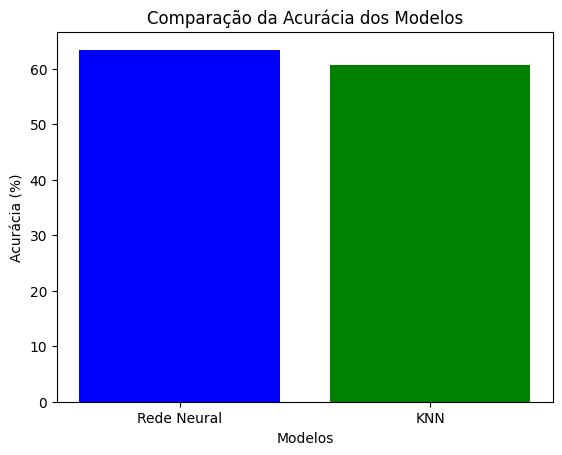

In [ ]:
# Comparando a acurácia dos modelos
accuracies = [accuracy * 100, accuracy_knn * 100]
models = ['Rede Neural', 'KNN']

plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Modelos')
plt.ylabel('Acurácia (%)')
plt.title('Comparação da Acurácia dos Modelos')
plt.show()

Análise:



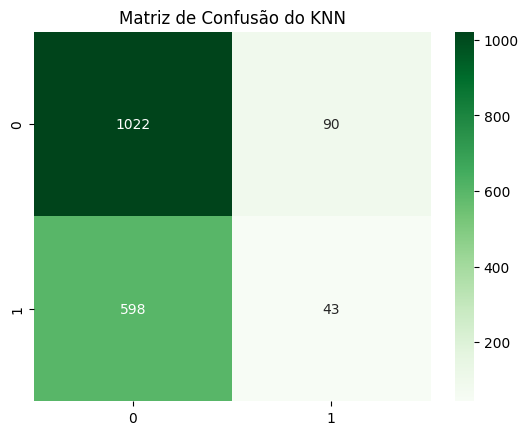

In [ ]:
# Matriz de confusão para o KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap='Greens')
plt.title('Matriz de Confusão do KNN')
plt.show()

Análise:



55/55 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


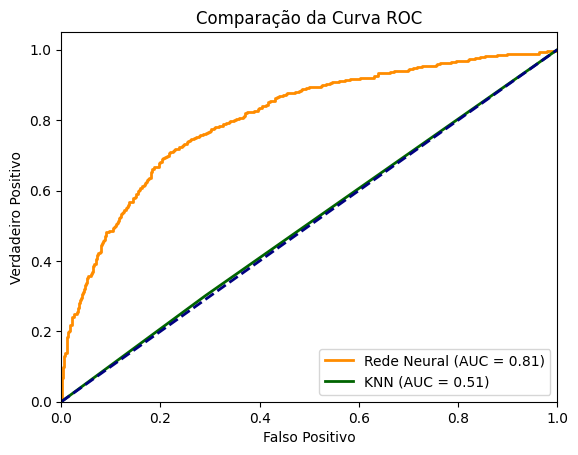

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculando a curva ROC e AUC para a Rede Neural
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, model.predict(X_test_scaled))
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Calculando a curva ROC e AUC para o KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn.predict_proba(X_test_scaled)[:,1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plotando a curva ROC para ambos os modelos
plt.figure()
plt.plot(fpr_nn, tpr_nn, color='darkorange', lw=2, label=f'Rede Neural (AUC = {roc_auc_nn:.2f})')
plt.plot(fpr_knn, tpr_knn, color='darkgreen', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Comparação da Curva ROC')
plt.legend(loc="lower right")
plt.show()


Análise:




Conclusão:
